**CURSO**: *Machine Learning* en Geociencias<br />
**Profesor**: Edier Aristizábal (evaristizabalg@unal.edu.co) <br />
**Credits**: The content of this notebook is taken from several sources: Soner Yıldırım, Bex T, Manuel Hupperich, Youssef Hosni and Piero Paialunga en www.towardsdatascience.com. Every effort has been made to trace copyright holders of the materials used in this book. The author apologies for any unintentional omissions and would be pleased to add an acknowledgment in future editions.

# Time Series Analysis: Decomposition

Time series is a sequence of values ordered in time. In this post, we will create time series data with different patterns. One advantage of synthetic datasets is that we can measure the performance of a model and have an idea about how it will perform with real life data. 
All time series can be decomposed into these
three elements:

* **Trend T(t)**: a long-term upward or downward change in the average value.
* **Seasonality S(t)**: Patterns that repeat observed or predictable intervals.
* **Residual R(t)**: random fluctuations in the time series data that does not follow any patterns.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

## Trend in Time Series

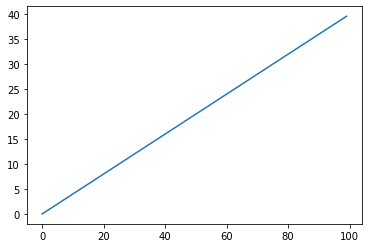

In [ ]:
time = np.arange(100)
values = time*0.4
plt.plot(time, values)

## Seasonality in Time Series
Does the data have a clear cyclical/periodic pattern?

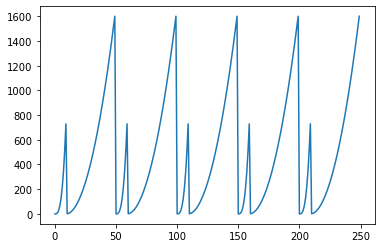

In [ ]:
# Just a random pattern
time = np.arange(50)
values = np.where(time < 10, time**3, (time-9)**2)
# Repeat the pattern 5 times
seasonal = []
for i in range(5):
    for j in range(50):
        seasonal.append(values[j])
# Plot
time_seasonal = np.arange(250)
plt.plot(time_seasonal, seasonal)

## Noise

What are the outliers or missing values that are not consistent with the rest of the data?

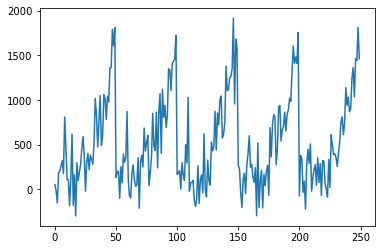

In [ ]:
noise = np.random.randn(250)*100
seasonal_noise= seasonal + noise
time_seasonal = np.arange(250)
plt.plot(time_seasonal, seasonal_noise)

## Multiple patterns

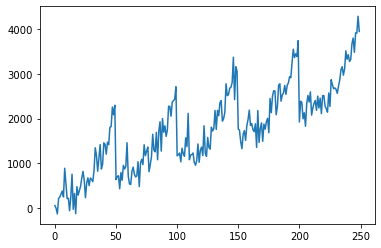

In [ ]:
seasonal_upward = seasonal_noise + np.arange(250)*10
time_seasonal = np.arange(250)
plt.plot(time_seasonal, seasonal_upward)

## Decomposition of Time Series

Visualizing the components of a time series is known as decomposition. Decomposition is
defined as a statistical task that separates a time series into its different components.

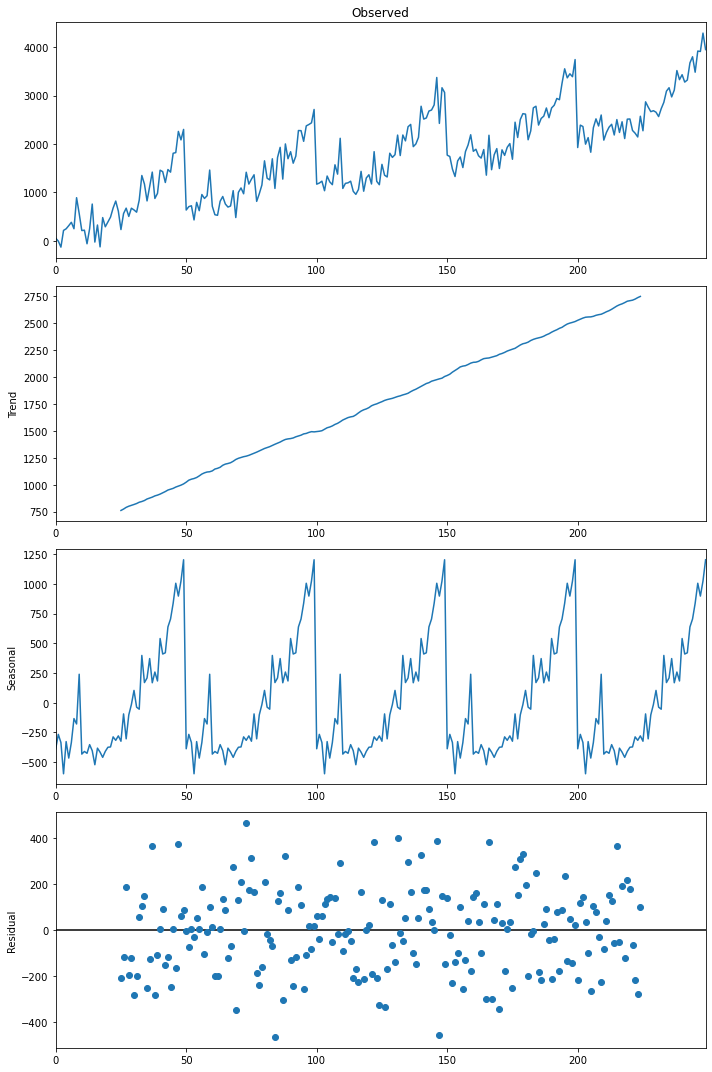

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose data
decomposition = seasonal_decompose(seasonal_upward, period=50)

# Plot decomposed data
plt.rcParams["figure.figsize"] = (10,15)
decomposition.plot()
plt.show()